Creating a Convolutional Neural Network (CNN) from scratch for MNIST handwritten digit classification is a great way to understand the fundamentals of deep learning and convolutional layers. We'll walk through the steps needed to develop, evaluate, and use a CNN for this task. We will use Python and popular libraries such as TensorFlow and Keras.

# Steps to Develop a CNN for MNIST Classification 

1-Import Libraries 

2- Load and Preprocess the Data Build the CNN Model 

3- Build the CNN Model Create a CNN model using Sequential

4-Compile the Model Train the Model 

5-Train the Model with the training data and validate it with the test data. Use ModelCheckpoint to save the best model

6- Evaluate the model on the test set

7-Save and Load the Model You can save and load the entire model using model.save() and tf.keras.models.load_model():

8-Make Predictions Use the loaded model to make predictions on new data:

9-Plot Training and Validation Accuracy

10-Plot Training and Validation Loss


In [2]:
# 1- Import Libraries
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint

In [3]:
# 2- Load and Preprocess the Data Build the CNN Model 
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Reshape the data to include the channel dimension and normalize
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255

# Convert class vectors to binary class matrices (one-hot encoding)
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 16s 1us/step


In [5]:
# 3- Build the CNN Model Create a CNN model using Sequential:

model = Sequential()

# First Convolutional Layer
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Second Convolutional Layer
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Third Convolutional Layer
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten and Fully Connected Layers
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))  # 10 classes for digits 0-9


In [6]:
# 4-Compile the Model Train the Model 

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [7]:
# 5-Train the Model with the training data and validate it with the test data. Use ModelCheckpoint to save the best model:
# Set up the checkpoint callback with the .keras extension
checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True)

# Train the model with the updated checkpoint callback
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=64,
                    validation_split=0.2,
                    callbacks=[checkpoint])

Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 29s 33ms/step - accuracy: 0.8244 - loss: 0.5780 - val_accuracy: 0.9713 - val_loss: 0.0967
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 25s 33ms/step - accuracy: 0.9736 - loss: 0.0928 - val_accuracy: 0.9780 - val_loss: 0.0740
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 25s 33ms/step - accuracy: 0.9797 - loss: 0.0646 - val_accuracy: 0.9817 - val_loss: 0.0608
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 25s 33ms/step - accuracy: 0.9852 - loss: 0.0482 - val_accuracy: 0.9849 - val_loss: 0.0502
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 25s 34ms/step - accuracy: 0.9891 - loss: 0.0355 - val_accuracy: 0.9859 - val_loss: 0.0473
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 28s 38ms/step - accuracy: 0.9905 - loss: 0.0290 - val_accuracy: 0.9864 - val_loss: 0.0471
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 44s 41ms/step - accuracy: 0.9926 - loss: 0.0233 - val_accuracy: 0.9847 - val_loss: 0.0563
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 26s 35ms/step - accuracy: 0.9928 - loss: 0.0221 - 

In [8]:
# 6- Evaluate the model on the test set
# Load the best model (optional, if not using the checkpoint callback)
# model.load_weights('best_model.h5')

test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test loss: {test_loss:.4f}')
print(f'Test accuracy: {test_acc:.4f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9856 - loss: 0.0602
Test loss: 0.0495
Test accuracy: 0.9884


In [9]:
# 7-Save and Load the Model You can save and load the entire model using model.save() and tf.keras.models.load_model():

# Save the entire model
model.save('mnist_cnn_model.h5')

# Load the model
loaded_model = tf.keras.models.load_model('mnist_cnn_model.h5')

In [10]:
# 8-Make Predictions Use the loaded model to make predictions on new data:
# Make predictions
predictions = loaded_model.predict(x_test)

# Convert predictions from probabilities to class labels
predicted_classes = np.argmax(predictions, axis=1)


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


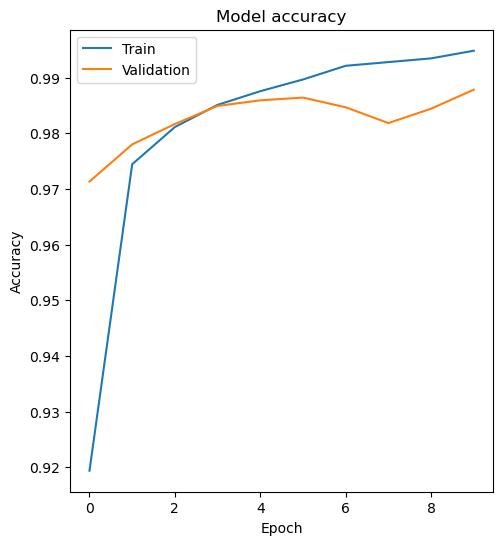

In [11]:
# 9-Plot Training and Validation Accuracy
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])


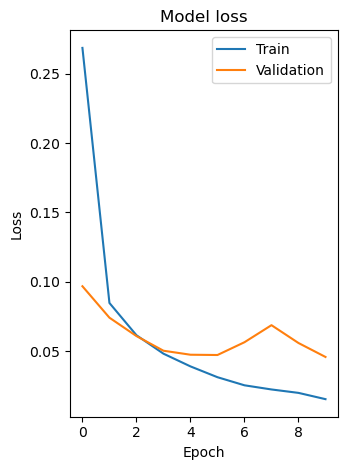

In [12]:
# 10-Plot Training and Validation Loss
# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])

plt.tight_layout()
plt.show()

# Here's the complete code snippet to visualize both accuracy and loss:

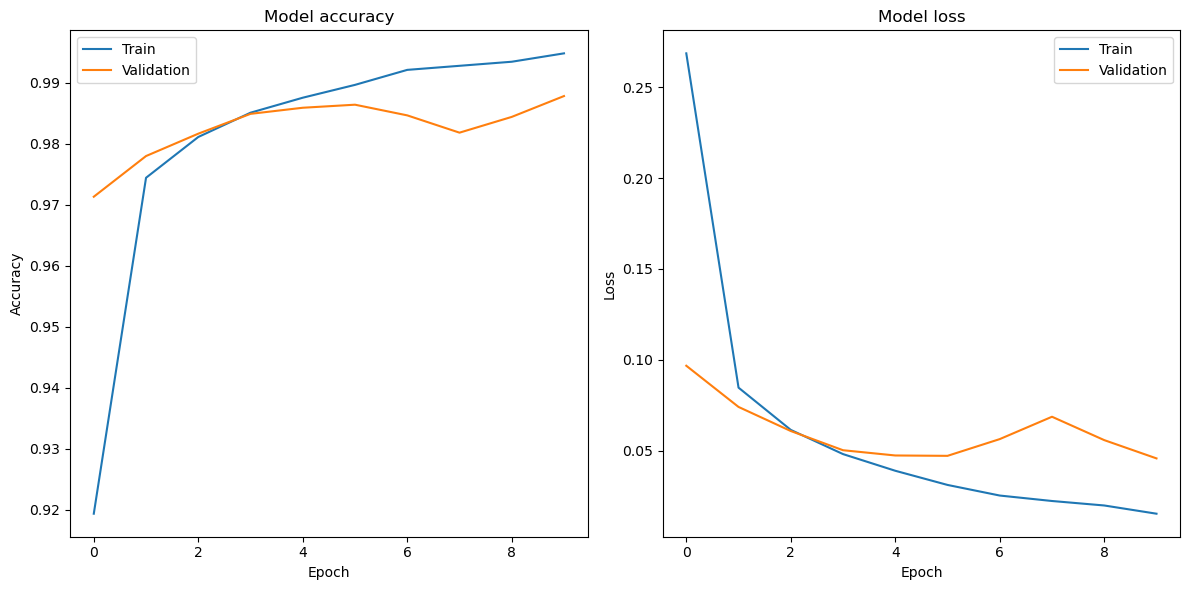

In [13]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])

plt.tight_layout()
plt.show()